In [4]:
%load_ext rpy2.ipython

<!-- HIV-1 IIIB Virus https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607
 -->
# Alignment 
Firstly, HIV genome indices created by changing sequence provided by Judd to `.fa` format. It didn't work as we needed gtf file! 

Ok! I'm switching to the [HIV-1 clone pIIIB from USA, complete genome
](https://www.ncbi.nlm.nih.gov/nucleotide/EU541617.1?report=genbank&log$=nuclalign&blast_rank=1&RID=8B8ETWT201R) which is highly matched with Judd's clone (using Blast alignment). Then, I donwloaded `.fa` and `.gff3` format for downstream analysis. 

In [1]:
# %%bash 
# # make hiv genome indices 
# bowtie2-build HIV/EU541617.1/EU541617.1.fasta HIV/EU541617.1/index
# # Aligning to hiv genome 
# for f in fastq_unmapped/*; do
# 	o=${f/.fastq/.bam};
#  	o=${o/fastq_unmapped/bam};
#  	bowtie2 --sensitive -N 1 -x HIV/EU541617.1/index -U $f | samtools sort -o $o;
# done

In [19]:
# https://metacpan.org/pod/bp_genbank2gff3.pl
# perl /rumi/shams/abe/Workflows/BioPerl/bp_genbank2gff3.pl HIV/HIV.seq | head

In [48]:
%%bash
# use STAR 
STAR --runThreadN 16 \
--runMode genomeGenerate \
--genomeDir HIV/EU541617.1/ \
--genomeFastaFiles HIV/EU541617.1/EU541617.1.fasta \
--sjdbGTFfile HIV/EU541617.1/EU541617.1.gff3 \
--sjdbOverhang 99 --genomeSAindexNbases 8 --sjdbGTFfeatureExon CDS

Apr 03 03:33:26 ..... started STAR run
Apr 03 03:33:26 ... starting to generate Genome files
Apr 03 03:33:26 ... starting to sort Suffix Array. This may take a long time...
Apr 03 03:33:26 ... sorting Suffix Array chunks and saving them to disk...
Apr 03 03:33:26 ... loading chunks from disk, packing SA...
Apr 03 03:33:26 ... finished generating suffix array
Apr 03 03:33:26 ... generating Suffix Array index
Apr 03 03:33:26 ... completed Suffix Array index
Apr 03 03:33:26 ..... processing annotations GTF
Apr 03 03:33:26 ... writing Genome to disk ...
Apr 03 03:33:26 ... writing Suffix Array to disk ...
Apr 03 03:33:26 ... writing SAindex to disk
Apr 03 03:33:26 ..... finished successfully


In [60]:
%%bash
# STAR --genomeLoad LoadAndExit --genomeDir HIV/EU541617.1/
for f in fastq_unmapped/*; do
	o=${f/.fastq/.bam};
	o=${o/fastq_unmapped/bam};
	echo STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn $f --outFileNamePrefix $o --limitBAMsortRAM 1000000000;
# 	STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn $f --outFileNamePrefix $o --limitBAMsortRAM 1000000000;
done
# STAR --genomeLoad Remove --genomeDir HIV/EU541617.1/

STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL14.input.fastq --outFileNamePrefix bam/s23.hiv.METTL14.input.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL14.m6A.fastq --outFileNamePrefix bam/s23.hiv.METTL14.m6A.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL3.input.fastq --outFileNamePrefix bam/s23.hiv.METTL3.input.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL3.m6A.fastq --outFileNamePrefix bam/s23.hiv.METTL3.m6A.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordi

In [65]:
%%bash 
for f in bam/*Aligned.sortedByCoord.out.bam; do o=${f/Aligned.sortedByCoord.out.bam/}; mv -v $f $o; done 

renamed 'bam/s23.hiv.METTL14.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL14.input.bam'
renamed 'bam/s23.hiv.METTL14.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL14.m6A.bam'
renamed 'bam/s23.hiv.METTL3.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL3.input.bam'
renamed 'bam/s23.hiv.METTL3.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL3.m6A.bam'
renamed 'bam/s23.hiv.NT.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.NT.input.bam'
renamed 'bam/s23.hiv.NT.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.NT.m6A.bam'
renamed 'bam/s23.hiv.Virma.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.Virma.input.bam'
renamed 'bam/s23.hiv.Virma.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.Virma.m6A.bam'
renamed 'bam/s23.hiv.WTAP.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.WTAP.input.bam'
renamed 'bam/s23.hiv.WTAP.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.WTAP.m6A.bam'
renamed 'bam/s24.hiv.MET

All `bam`  files (mapped to human genome or hiv genome) renamed in this format: 
> `<sample>.<species>.<treatment>.<input/m6A>.bam`

# HIV

### Peak calling for HIV genome using exomePeak

In [19]:
%%R
library(exomePeak)

In [62]:
%%R
run_exomepeak <- function(
    WINDOW = 200, STEP = 30, LENGTH = 100, FDR = 0.05, ENRICH = 1
#     , CONSISTENT_PEAK_CUTOFF_PVALUE = 0.05, CONSISTENT_PEAK_FOLD_ENRICHMENT = 1
){
    setwd("~/People/Judd/bam")
    name_it = paste('WINDOW',WINDOW,'STEP',STEP,'LENGTH',LENGTH,'FDR',FDR,'ENRICH',ENRICH, sep = '_')
    res <- exomepeak(
        TXDB = txdb,
        IP_BAM=list.files(pattern='hiv.NT.m6A.bam$'),
        INPUT_BAM=list.files(pattern='hiv.NT.input.bam$'),
        OUTPUT_DIR='../exomepeak/hiv.control/',
        EXPERIMENT_NAME=name_it,
        # options 
        WINDOW_WIDTH = WINDOW, 
        SLIDING_STEP = STEP, 
        FRAGMENT_LENGTH = LENGTH,
        
        PEAK_CUTOFF_FDR = FDR,
        FOLD_ENRICHMENT = ENRICH,
        
#         CONSISTENT_PEAK_CUTOFF_PVALUE = CONSISTENT_PEAK_CUTOFF_PVALUE,
#         CONSISTENT_PEAK_FOLD_ENRICHMENT = CONSISTENT_PEAK_FOLD_ENRICHMENT
    )
    
    ifelse(!dir.exists(file.path('../exomepeak/hiv.control/', name_it)), 
           dir.create(file.path('../exomepeak/hiv.control/', name_it)), FALSE)
    
    saveRDS(res, paste('../exomepeak/hiv.control/',name_it,'/results.rds',sep='') )
    setwd("~/People/Judd")    
}

In [64]:
%%R 
GENE_ANNO_GTF="/rumi/shams/abe/People/Judd/HIV/EU541617.1/EU541617.1.gff3"
txdb = makeTxDbFromGFF(GENE_ANNO_GTF)

for (W in seq(15,30, by = 15)){
    for (S in seq(5,15,by =5)){
        for (L in seq(15,25,by = 5)){
            for (F in c(0.01,0.025)){
                for (E in c(0.1,0.2,1)){
                    run_exomepeak(WINDOW = W, STEP = S, LENGTH = L, FDR = F, ENRICH = E)
                }}}}}


R[write to console]: Import genomic features from the file as a GRanges object ... 
R[write to console]: OK

R[write to console]: Prepare the 'metadata' data frame ... 
R[write to console]: OK

R[write to console]: Make the TxDb object ... 
R[write to console]: OK

R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "13 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "16 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "11 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_5_LENGTH_25_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_10_LENGTH_25_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "9 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "7 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_15_STEP_15_LENGTH_25_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "10 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "10 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_5_LENGTH_25_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_10_LENGTH_25_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "8 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_15_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.2"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_1"
[1] "8 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_20_FDR_0.025_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.01_ENRICH_1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.1"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.2"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_0.2"


R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."
[1] "Get the consistent peaks ..."
[1] "---------------------------------"
[1] "The bam files used:"
[1] "2 IP replicate(s)"
[1] "2 Input replicate(s)"
[1] "---------------------------------"
[1] "Peak calling result: "
[1] "9 peaks detected on merged data."
[1] "Please check 'peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_1"
[1] "7 consistent peaks detected on every replicates. (Recommended list)"
[1] "Please check 'con_peak.bed/xls' under ../exomepeak/hiv.control//WINDOW_30_STEP_15_LENGTH_25_FDR_0.025_ENRICH_1"


In [14]:
%%R 
res = readRDS(file ='exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/results.rds')
length(res$con_peaks)

[1] 16


In [15]:
%%R 
subjectHits(findOverlaps(res$con_peaks))

 [1]  6  3  1  2  6  6  3  1  4  7  5  2  6  3  1  4  7  8  9 10 11 12 13 14 15
[26] 16


In [76]:
cat exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.bed

# chr	chromStart	chromEnd	name	score	strand	thickStart	thickEnd	itemRgb	blockCount	blockSizes	blockStarts
EU541617.1	7945	7956	tat	6.3e-27	+	7945	7956	0	1	11,	0
EU541617.1	5519	5530	rev	1.5e-07	+	5519	5530	0	1	11,	0
EU541617.1	5583	7929	rev	1e-138	+	5583	7929	0	2	7,9,	0,2337
EU541617.1	7943	8195	rev	0	+	7943	8195	0	1	252,	0
EU541617.1	7882	7893	env	1e-16	+	7882	7893	0	1	11,	0
EU541617.1	7927	8337	env	0	+	7927	8337	0	1	410,	0
EU541617.1	8373	8463	nef	5e-51	+	8373	8463	0	1	90,	0
EU541617.1	8507	8523	nef	7.9e-16	+	8507	8523	0	1	16,	0
EU541617.1	8561	8632	nef	7.9e-76	+	8561	8632	0	1	71,	0
EU541617.1	8641	8845	nef	1e-143	+	8641	8845	0	1	204,	0
EU541617.1	8854	8880	nef	1e-116	+	8854	8880	0	1	26,	0
EU541617.1	8913	8924	nef	8.5e-05	+	8913	8924	0	1	11,	0
EU541617.1	8943	8959	nef	2e-78	+	8943	8959	0	1	16,	0


### Motif analysis 

In [10]:
%%bash
bedtools getfasta -name -split -s -fi HIV/EU541617.1/EU541617.1.fasta \
-bed exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.bed \
-fo exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.fa

In [5]:
cat exomepeak/control/motifs_of_interest.txt

[AG]GAC
[AGT][AG]AC[ACT]


In [73]:
import re

def read_fasta(path):
    file = open(path)
    lines = file.read().splitlines()
    ids = [s[1:] for s in lines if '>' in s]
    n = [i for i,s in enumerate(lines) if '>' in s]
    n.append(len(lines))
    sequences = [''.join(lines[i+1:j]) for i,j in zip(n[:-1],n[1:])]
    file.close()
    fa = dict(zip(ids, sequences))
    return fa

peaks = read_fasta('exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.fa')

DRACH = re.compile('[AGT][AG]AC[ACT]')
RGAC = re.compile('[AG]GAC')
# DRACH.match(
[[f,RGAC.search(peaks[f]), DRACH.search(peaks[f])] 
     for f in peaks 
         if RGAC.search(peaks[f]) is not None or DRACH.search(peaks[f]) is not None
]

[['rev::EU541617.1:7943-8195(+)',
  <re.Match object; span=(42, 46), match='AGAC'>,
  <re.Match object; span=(42, 47), match='AGACA'>],
 ['env::EU541617.1:7927-8337(+)',
  <re.Match object; span=(14, 18), match='GGAC'>,
  <re.Match object; span=(14, 19), match='GGACC'>],
 ['nef::EU541617.1:8373-8463(+)',
  <re.Match object; span=(25, 29), match='AGAC'>,
  <re.Match object; span=(69, 74), match='AGACC'>],
 ['nef::EU541617.1:8561-8632(+)',
  <re.Match object; span=(5, 9), match='AGAC'>,
  <re.Match object; span=(5, 10), match='AGACC'>],
 ['nef::EU541617.1:8641-8845(+)',
  <re.Match object; span=(12, 16), match='AGAC'>,
  <re.Match object; span=(12, 17), match='AGACA'>],
 ['nef::EU541617.1:8854-8880(+)',
  None,
  <re.Match object; span=(5, 10), match='TGACC'>],
 ['nef::EU541617.1:8943-8959(+)',
  None,
  <re.Match object; span=(6, 11), match='GAACT'>]]

# Running a custom pipeline 

Here we're using https://github.com/gold-lab/bed12ToGTF to make gtf file from control exomepeak result.

https://metacpan.org/pod/Bio::FeatureIO::gtf

In [4]:
%%bash
cat exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.bed | sort -k4 | \
# rename features peak by peak
awk -F "\t" '{OFS=FS}NR>1{$4=$4"_peak"}; cnt[$4]++{$4=$4"_"cnt[$4]} 1' | \
# bed12 to gtf
perl ../../Workflows/bed12ToGTF/bed12ToGTF.1.pl | \
awk '{gsub(/\"|\;/,"")}1''{gsub(/transcript_id/,"gene_id")}1''{gsub(/ exon_number [[:digit:]]/,"")}1' > exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.gtf

In [5]:
!cat exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.gtf

# chr	blank	transcript	1	chromEnd	.	strand	.	gene_id name
EU541617.1	blank	transcript	7928	8337	.	+	.	gene_id env_peak
EU541617.1	blank	exon	7928	8337	.	+	.	gene_id env_peak
EU541617.1	blank	transcript	7883	7893	.	+	.	gene_id env_peak_2
EU541617.1	blank	exon	7883	7893	.	+	.	gene_id env_peak_2
EU541617.1	blank	transcript	8855	8880	.	+	.	gene_id nef_peak
EU541617.1	blank	exon	8855	8880	.	+	.	gene_id nef_peak
EU541617.1	blank	transcript	8642	8845	.	+	.	gene_id nef_peak_2
EU541617.1	blank	exon	8642	8845	.	+	.	gene_id nef_peak_2
EU541617.1	blank	transcript	8944	8959	.	+	.	gene_id nef_peak_3
EU541617.1	blank	exon	8944	8959	.	+	.	gene_id nef_peak_3
EU541617.1	blank	transcript	8374	8463	.	+	.	gene_id nef_peak_4
EU541617.1	blank	exon	8374	8463	.	+	.	gene_id nef_peak_4
EU541617.1	blank	transcript	8508	8523	.	+	.	gene_id nef_peak_5
EU541617.1	blank	exon	8508	8523	.	+	.	gene_id nef_peak_5
EU541617.1	blank	transcript	8562	8632	.	+	.	gene_id nef_peak_6
EU541617.1	blank	exon	8562	8632	.	+	.	gene_id n

Using `bamToBed` to count reads which are present in control peak cordinates (found by `exomepeak`).

In [14]:
%%bash
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP' 'NT')
for enz in "${StringArray[@]}"; 
    do for f in bam/*hiv.$enz*.bam; 
        do out=${f/.bam/.fc}; out=${out/bam/peakcount};             
#             echo bamToBed -i $f $out # | \
#             intersectBed -s -wo -a - -b exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.bed | \
#             cut -f10 | sort | uniq -c | awk '{ print $2 "\t" $1}' # > $out
            featureCounts -T 12 -O -t exon -g gene_id \
            -a exomepeak/hiv.control/WINDOW_15_STEP_5_LENGTH_15_FDR_0.01_ENRICH_0.1/peak.gtf \
            -o $out $f;
    done;
done


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S bam/s23.hiv.METTL14.input.bam                  ||
||                                                                            ||
||             Output file : peakcount/s23.hiv.METTL14.input.fc               ||
||                 Summary : peakcount/s23.hiv.METTL14.input.fc.s

In [3]:
%reload_ext rpy2.ipython

In [5]:
%%R
library(DESeq2)
library(ggplot2)
library(tidyverse)
library(pheatmap)

In [6]:
%%R 
files <- grep('hiv', list.files(path = "peakcount/", pattern=".fc$") , value=TRUE)
# meta
reps <- c(rep('s23',10),rep('s24',10))
ip <- rep(c('input','m6A'),10)
treatment <- rep(unlist(lapply(c('METTL14','METTL3','NT','Virma','WTAP'), rep, 2)),2)
conds <- paste(treatment,ip,sep='.')
all_conds <- paste(reps,treatment, ip, sep='.')
# read peak counts  
datalist <- lapply(files, function(x){read.table(file=paste('peakcount/', x, sep = ""),skip=1,sep='\t',header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
colnames(m) <- all_conds
colData <- data.frame(cond = conds, row.names=colnames(m))
colData

                           cond
s23.METTL14.input METTL14.input
s23.METTL14.m6A     METTL14.m6A
s23.METTL3.input   METTL3.input
s23.METTL3.m6A       METTL3.m6A
s23.NT.input           NT.input
s23.NT.m6A               NT.m6A
s23.Virma.input     Virma.input
s23.Virma.m6A         Virma.m6A
s23.WTAP.input       WTAP.input
s23.WTAP.m6A           WTAP.m6A
s24.METTL14.input METTL14.input
s24.METTL14.m6A     METTL14.m6A
s24.METTL3.input   METTL3.input
s24.METTL3.m6A       METTL3.m6A
s24.NT.input           NT.input
s24.NT.m6A               NT.m6A
s24.Virma.input     Virma.input
s24.Virma.m6A         Virma.m6A
s24.WTAP.input       WTAP.input
s24.WTAP.m6A           WTAP.m6A


using `DESeq2` to find differential methylation peaks: 

### Contrast design: $\frac{m6A^{treated}}{input^{treated}}$ vs.$\frac{m6A^{nontreated}}{input^{nontreated}}$

In [7]:
%%R -o all_mat
options(repr.plot.width=4, repr.plot.height=4)
all_mat = list(); all_res = list(); all_nuc = list()
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    icond = c(grep(treat,all_conds), grep('NT',all_conds) )
    mm <- m[,icond]
    colData <- data.frame(cond= conds[icond], row.names=colnames(mm))
    dds <- DESeqDataSetFromMatrix(countData = mm, colData = colData, design = ~ cond)
    dds$cond <- relevel(dds$cond, ref="NT.input")
    dds <- DESeq(dds, fitType='mean')
    # contrast design: (treat_m6A - treat_input) - (NT_m6A - NT_input)
    res <- results(dds, 
                   contrast=list(
                       c(paste("cond_",treat,".m6A_vs_NT.input",sep="")), 
                       c(paste("cond_",treat,".input_vs_NT.input",sep=""),
                         "cond_NT.m6A_vs_NT.input")), 
                   listValues=c(1,-1))        
    all_res[[treat]] <- res
    vsd <- varianceStabilizingTransformation(dds)
    # Plot heatmap: dataframe
    mat <- assay(vsd)
    df <- data.frame(mat)
    colnames(df) = c(
        's23.treat.input','s23.treat.m6A','s24.treat.input','s24.treat.m6A',
        's23.NT.input','s23.NT.m6A','s24.NT.input','s24.NT.m6A'
    )
    all_mat[[treat]] = df
   # normalized counts 
    ncu <- counts(dds, normalized=TRUE)
    all_nuc [[treat]] <- ncu
#     cds <- estimateDispersions(dds)
#     rld <- rlogTransformation(dds)
#     # save scales to normalize peak visulization with GViz 
#     dds <- estimateSizeFactors(dds)
#     scale_df <- data.frame('scale' = 1/sizeFactors(dds))
#     print (scale_df)
#     write.table(scale_df, paste("bigwig/hiv/",treat,"/scale.txt", sep=''), sep="\t", quote=FALSE, col.names=NA)
}

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- note: fitType='para

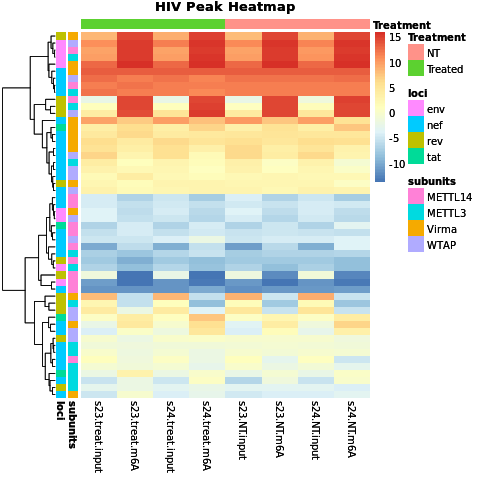

In [8]:
%%R
num_peaks <- 13
mat <-do.call('rbind',all_mat)
# Data frame with column annotations.
mat_col <- data.frame(Treatment = c(rep('Treated',4),rep('NT',4)))
mat_row <- data.frame(
    subunits = c(rep('METTL14', num_peaks), rep('METTL3', num_peaks), rep('Virma', num_peaks), rep('WTAP', num_peaks) ),
    loci = c(rep('env',2),rep('nef',7),rep('rev',3),'tat')
)
rownames(mat_col) <- colnames(mat)
rownames(mat_row) <- rownames(mat)

h = pheatmap(
    mat               = mat,
    border_color      = NA,
    show_colnames     = TRUE,
    show_rownames     = FALSE,
    annotation_col    = mat_col,
    annotation_row    = mat_row,
    fontsize          = 10,
    cluster_rows = TRUE, cluster_cols=FALSE, #cellwidth = 25, cellheight = 15,
  main              = "HIV Peak Heatmap"
)
# ggsave("plots/hiv.peak_Heatmaps.png", plot = h, device = 'png', dpi = 300)
# ggsave("plots/hiv.peak_Heatmaps.pdf", plot = h, device = 'pdf', dpi = 300)
h

In [52]:
%%R 
library (scales)
peak_names <-rownames(all_nuc[[1]])
num_peaks <- length (peak_names)

m = as.matrix(do.call('cbind',all_nuc))
q = c()
for (i in seq(1:nrow(m))){  q = c(q, m[i,]) }
values <- as.numeric(q)
conds <- names(q)

peaks <- unlist(lapply(peak_names,rep,32))
reps <- rep(c(rep('s23',2),rep('s24',2)), 8*num_peaks)
ips <- rep(c('input','m6A'), 16*num_peaks)
enzymes <- rep(unlist(lapply(c('METTL14','METTL3','Virma','WTAP'),rep,8)), num_peaks)
treatments <- rep(c(rep('treated',4),rep('NT',4)), num_peaks)

data0 = data.frame( 
    value=abs(values), peak=peaks, enzyme=enzymes, treatment=treatments, 
    rep=reps, ip= ips, cond=paste(reps, enzymes,treatments,sep='.')) 

input_val= data0$value [1:(dim(data0)[1]/2)*2-1] 
m6A_val  = data0$value [1:(dim(data0)[1]/2)*2  ] 

data = data0[1:(dim(data0)[1]/2)*2, c(2:5,7)]
data$value = m6A_val / input_val

head(data, n = 8)

       peak  enzyme treatment rep                cond    value
2  env_peak METTL14   treated s23 s23.METTL14.treated 6.034002
4  env_peak METTL14   treated s24 s24.METTL14.treated 6.394434
6  env_peak METTL14        NT s23      s23.METTL14.NT 5.968340
8  env_peak METTL14        NT s24      s24.METTL14.NT 6.045108
10 env_peak  METTL3   treated s23  s23.METTL3.treated 5.178247
12 env_peak  METTL3   treated s24  s24.METTL3.treated 6.721033
14 env_peak  METTL3        NT s23       s23.METTL3.NT 5.968340
16 env_peak  METTL3        NT s24       s24.METTL3.NT 5.996870


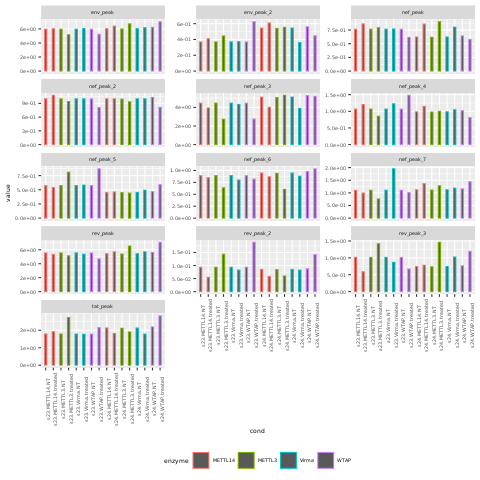

In [54]:
%%R
fill <- c("#40b8d0", "#b2d183") 

ggplot (data, aes(y=value, x=cond)) + 
    geom_bar (aes(y=value, x=cond, colour=enzyme), width=0.3, position="dodge", stat="identity") + 
    facet_wrap (~peak, scales = "free_y", ncol=3) + 
    theme (text=element_text(size=6), axis.text.x=element_text(angle=90), legend.position="bottom") + 
    scale_y_continuous (labels=scientific) # + 
    # scale_fill_manual(values=fill) 


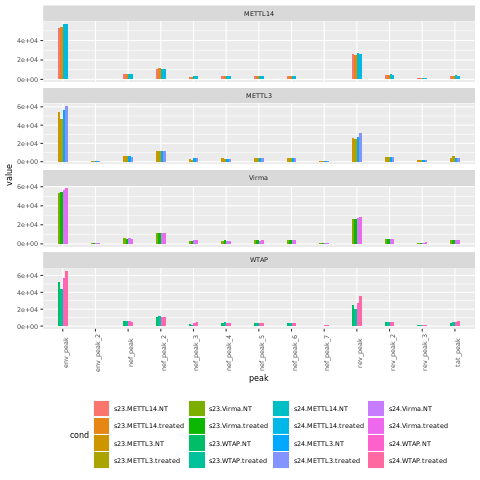

In [58]:
%%R 
# fill <- c("#40b8d0", "#b2d183")
ggplot(data0, aes(y=value, x=peak)) +
    geom_bar(
        aes(fill = cond),
        width=0.3, position="dodge", stat="identity") +
    facet_wrap(~enzyme,scales = "free_y", ncol=1) +
    theme(text = element_text(size=8),axis.text.x = element_text(angle = 90), legend.position = "bottom") + 
    scale_y_continuous(labels = scientific) #+ 
#     scale_fill_manual(values=fill)

<!-- ## Plot peak cordinates

making `bigwig` file from `bam` files to visualize genome coverage of peak coordinates of hiv genome. 
-->

In [21]:
# %%bash 
# declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP' 'NT')
# # mkdir bedgraph/hiv/
# # for treat in "${StringArray[@]}"; do mkdir bedgraph/hiv/$treat; done

# # normalize 
# # # bigwigs 
# # for treat in "${StringArray[@]}"; do
# #     awk '!(NR<=1){gsub(/s2[3-4]./,substr($1, 0, 4)"hiv.");print "bamCoverage --scaleFactor "$2" -b bam/"$1".bam -o bigwig/'$treat'/"$1".bw"}' bigwig/$treat/scale.txt # | bash
# # done

# # bedgraphs using bedtools 
# for treat in "${StringArray[@]}"; do
#     for f in bam/*hiv*$treat*bam; do 
#         base=`basename "$f"`
#         o=${base/.bam/.bg}
#         bedtools genomecov -bga -ibam $f > bedgraph/hiv/$treat/$o;
#     done;
# #     awk '!(NR<=1){gsub(/s2[3-4]./,substr($1, 0, 4)"hiv.");print "bedtools genomecov -bga -scale "$2" -ibam bam/"$1".bam > bedgraph/hiv/'$treat'/"$1".bg"}' bigwig/hiv/$treat/scale.txt | bash
# done

In [22]:
# ls -l bedgraph/hiv/Virma/

In [23]:
# %reload_ext rpy2.ipython

In [24]:
# %%R 
# library(Gviz)
# library(Rsamtools)
# library(data.table)
# library(Biostrings)
# library(rtracklayer)

In [25]:
# %%R
# # hiv_dna <- readDNAStringSet("exomepeak/hiv.control/peak.fa")
# # names(hiv_dna) <- rep('chr1', length(hiv_dna))
# # # export(hiv_dna, "HIV/HIV.fa.2bit")
# # # hiv <- TwoBitFile("HIV/HIV.fa.2bit")

# # read HIV genome 
# hiv_peaks <- read.table(file="exomepeak/hiv.control/peak.bed", sep="\t")[,c(2,3)]
# colnames(hiv_peaks) <- c('start', 'end')
# hiv_gr <- GRanges(seqnames="chr1", range=IRanges(start=hiv_peaks$start, end=hiv_peaks$end),strand='*')
# names(hiv_gr) <- paste('peak', c(1:dim(hiv_peaks)[1]), sep='-')
# genome(hiv_gr) <- 'HIV'; gen<- 'HIV'
# chr <- as.character(unique(seqnames(hiv_gr)))

In [26]:
# %%R
# hiv_gr

<!-- using normalized `bedgraph` and making `Gviz` tracks  -->

In [27]:
# %%R
# for (treat in c('METTL14','METTL3','Virma','WTAP')){
#     reps <- c(rep('s23',2),rep('s24',2))
#     ip <- rep(c('input','m6A'),2)
#     conds <- paste(reps,treat, sep='.')
#     # absolute path to bedgraph files  
#     bw_files.treated <- paste('bedgraph/hiv/',treat,'/',reps,'.hiv.',treat,'.',ip,'.bg', sep='')
#     bw_files.nontreated <- paste('bedgraph/hiv/',treat,'/',reps,'.hiv.NT.',ip,'.bg', sep='')
#     print (bw_files.treated)
#     print (bw_files.nontreated)
#     for (i in c(2,4)){
#         ### read bedgraph files
#         #-- treated tracks --#
#         # m6A track           
#         bw_ip.treated <- import.bedGraph(bw_files.treated[i]) #,as="GRanges")
#         genome(bw_ip.treated) <- 'HIV'
#         seqlevels(bw_ip.treated) <- 'chr1'
#         # input track
#         bw_in.treated <- import.bedGraph(bw_files.treated[i-1]) #,as="GRanges")
#         genome(bw_in.treated) <- 'HIV'
#         seqlevels(bw_in.treated) <- 'chr1'
#         # Overlay input and m6A
#         dtrack_ip.treated <- DataTrack(bw_ip.treated,chomosome="chr1", name='Treated')
#         dtrack_in.treated <- DataTrack(bw_in.treated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
#         displayPars(dtrack_ip.treated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE)
#         assign(paste('treated', conds[i],sep='.'),
#                OverlayTrack(trackList=list(dtrack_ip.treated,dtrack_in.treated)))
#         #-- non-treated tracks --#
#         # m6A track
#         bw_ip.nontreated <- import.bedGraph(bw_files.nontreated[i]) # ,as="GRanges")
#         genome(bw_ip.nontreated) <- 'HIV'
#         seqlevels(bw_ip.nontreated) <- 'chr1'
#         # input track
#         bw_in.nontreated <- import.bedGraph(bw_files.nontreated[i-1]) # ,as="GRanges")
#         genome(bw_in.nontreated) <- 'HIV'
#         seqlevels(bw_in.nontreated) <- 'chr1'
#         # Overlay input and m6A
#         dtrack_ip.nontreated <- DataTrack(bw_ip.nontreated,chomosome="chr1", name='Non-treated')
#         dtrack_in.nontreated <- DataTrack(bw_in.nontreated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
#         displayPars(dtrack_ip.nontreated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE, name = 'Non treated')
#         assign(paste('nontreated',conds[i],sep='.'), 
#                OverlayTrack(trackList=list(dtrack_ip.nontreated,dtrack_in.nontreated),
#                             background.panel = "#FFFEDB", background.title = "darkblue"))
#     }
# }

# grtrack <- GeneRegionTrack(hiv_gr, genome = gen, chromosome = chr, name = "Gene Model")
# gtrack <- GenomeAxisTrack()

In [28]:
# %%R
# peak_ploter <- function(treat,ymax, saveplot = '' ){
#     for (i in 1:4){
#         if (saveplot == 'pdf') pdf(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".pdf",sep=''), 
#                                    width=7, height=7, paper = "a4r")
#         if (saveplot == 'png') png(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".png",sep=''))
#         plotTracks(
#             list (gtrack, grtrack,
#                   get (paste('treated.s23', treat, sep ='.')),get(paste('treated.s24', treat, sep ='.')),
#                   get (paste('nontreated.s23', treat,sep ='.')),get(paste('nontreated.s24', treat,sep ='.'))
#                  ), type="l",from=start(hiv_gr)[i], to=end(hiv_gr)[i] , ylim= c(-100,ymax[i]),
#             main = paste(treat, names(hiv_gr)[i]), add53=T,chromosome = "chr1",cex=1)
#         if (saveplot != '') dev.off()
#     }
# }

In [29]:
# %%R
# treat = 'METTL14'
# y = c(1e3,6e3,1.5e4,1e4)
# p = peak_ploter (treat,ymax)
# p = peak_ploter (treat,ymax)

In [30]:
# %%R
# treat = 'METTL14'
# y = c(1e3,6e3,1.5e4,1e4)
# p = peak_ploter (treat,ymax, saveplot='pdf')
# p = peak_ploter (treat,ymax, saveplot='png')

# treat = 'METTL3'
# y = c(1e3,6e3,1.5e4,1e4)
# p = peak_ploter (treat,ymax, saveplot='pdf')
# p = peak_ploter (treat,ymax, saveplot='png')

# treat = 'Virma'
# y = c(1e3,6e3,1.5e4,1e4)
# p = peak_ploter (treat,ymax, saveplot='pdf')
# p = peak_ploter (treat,ymax, saveplot='png')

# treat = 'WTAP'
# y = c(1e3,6e3,1.5e4,1e4)
# p = peak_ploter (treat,ymax, saveplot='pdf')
# p = peak_ploter (treat,ymax, saveplot='png')

In [84]:
%%R 
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/deseq/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    tools     stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12             forcats_0.4.0              
 [3] stringr_1.4.0               dplyr_0.8.3                
 [5] purrr_0.3.3                 readr_1.3.1                
 [7] tidyr_1.0.0                 tibble_2.1.3               
 [9] tidyverse_1.2.1  